<a href="https://colab.research.google.com/github/Michalinh0/DS2022/blob/main/TimeSeriesRegression/MarsSpaceship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install darts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
def logic(index):
 
    if index % 24 == 0:
        return False
 
    return True

df = pd.read_csv("https://iznz.srv47481.seohost.com.pl/data60.csv", na_values = '?')

df.columns = [c.replace('[' , '_') for c in list(df.columns)]
df.columns = [c.replace(']' , '_') for c in list(df.columns)]

pd.set_option("display.max_rows", 600)
df.dtypes

ut_ms                                        int64
panels _J/m2_@influx                       float64
front _J/m2_@influx                        float64
back _J/m2_@influx                         float64
left _J/m2_@influx                         float64
right _J/m2_@influx                        float64
up _J/m2_@influx                           float64
down _J/m2_@influx                         float64
panels-sum1 _J/m2_@influx_sum              float64
panels-sum1-decay0.9 _J/m2_@influx_sum     float64
panels-sum1-decay0.75 _J/m2_@influx_sum    float64
panels-sum1-decay0.5 _J/m2_@influx_sum     float64
panels-sum1-decay0.25 _J/m2_@influx_sum    float64
panels-sum2 _J/m2_@influx_sum              float64
panels-sum2-decay0.9 _J/m2_@influx_sum     float64
panels-sum2-decay0.75 _J/m2_@influx_sum    float64
panels-sum2-decay0.5 _J/m2_@influx_sum     float64
panels-sum2-decay0.25 _J/m2_@influx_sum    float64
front-sum1 _J/m2_@influx_sum               float64
front-sum1-decay0.9 _J/m2_@infl

In [3]:
df.head()

,ut_ms,panels _J/m2_@influx,front _J/m2_@influx,back _J/m2_@influx,left _J/m2_@influx,right _J/m2_@influx,up _J/m2_@influx,down _J/m2_@influx,panels-sum1 _J/m2_@influx_sum,panels-sum1-decay0.9 _J/m2_@influx_sum,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
0,1219363260000,1.880060e+09,1.819714e+09,0.0,0.000000e+00,1.115663e+07,0.000000e+00,4.723260e+08,NaN,NaN,...,0.000574,0.001529,0.159770,0.005765,0.005284,0.000530,0.000527,0.000764,0.006768,0.003389
1,1219366860000,1.880149e+09,1.819874e+09,0.0,0.000000e+00,1.115169e+07,0.000000e+00,4.723065e+08,1.880060e+09,1.692054e+09,...,0.000559,0.001482,0.044725,0.005597,0.005026,0.000509,0.000502,0.000726,0.006583,0.003262
2,1219370460000,1.856999e+09,1.789827e+09,0.0,4.362176e+06,1.598348e+07,1.448610e+08,3.807518e+08,1.880149e+09,1.692134e+09,...,0.000573,0.001508,0.287059,0.005695,0.005097,0.000514,0.000514,0.000731,0.006578,0.003296
3,1219374060000,1.504105e+09,1.440780e+09,0.0,6.976483e+08,0.000000e+00,2.713091e+08,3.918346e+08,1.856999e+09,1.671299e+09,...,0.000578,0.001521,0.137181,0.005735,0.005248,0.000528,0.000516,0.000748,0.006737,0.003423
4,1219377660000,1.878858e+09,1.817652e+09,0.0,3.823645e+06,9.899647e+06,0.000000e+00,4.806031e+08,1.504105e+09,1.353695e+09,...,0.000566,0.001521,0.060457,0.005760,0.005177,0.000525,0.000526,0.000739,0.006675,0.003377


In [4]:
plt.rcParams["figure.figsize"] = (10,10)

def plot_series(df, downsample_rate=100):
    for column in df.columns:
      if("NPWD" in column):
        plt.figure()
        df[column].iloc[::downsample_rate].plot()
        plt.title(column)
        plt.show()


In [5]:
df = df.astype(np.float32)
df.dtypes

ut_ms                                      float32
panels _J/m2_@influx                       float32
front _J/m2_@influx                        float32
back _J/m2_@influx                         float32
left _J/m2_@influx                         float32
right _J/m2_@influx                        float32
up _J/m2_@influx                           float32
down _J/m2_@influx                         float32
panels-sum1 _J/m2_@influx_sum              float32
panels-sum1-decay0.9 _J/m2_@influx_sum     float32
panels-sum1-decay0.75 _J/m2_@influx_sum    float32
panels-sum1-decay0.5 _J/m2_@influx_sum     float32
panels-sum1-decay0.25 _J/m2_@influx_sum    float32
panels-sum2 _J/m2_@influx_sum              float32
panels-sum2-decay0.9 _J/m2_@influx_sum     float32
panels-sum2-decay0.75 _J/m2_@influx_sum    float32
panels-sum2-decay0.5 _J/m2_@influx_sum     float32
panels-sum2-decay0.25 _J/m2_@influx_sum    float32
front-sum1 _J/m2_@influx_sum               float32
front-sum1-decay0.9 _J/m2_@infl

Wywalenie NaNow gdy target sie zjebal
Interpolacja reszty
jak cos przezylo interpolacje tez wyjebane

pamietac o standaryzacji danych


In [6]:
targets = df.columns[-33:]
print(targets)
df = df.interpolate()
df = df.ffill()
df = df.bfill()

df.isna().sum()


Index(['NPWD2372', 'NPWD2401', 'NPWD2402', 'NPWD2451', 'NPWD2471', 'NPWD2472',
       'NPWD2481', 'NPWD2482', 'NPWD2491', 'NPWD2501', 'NPWD2531', 'NPWD2532',
       'NPWD2551', 'NPWD2552', 'NPWD2561', 'NPWD2562', 'NPWD2691', 'NPWD2692',
       'NPWD2721', 'NPWD2722', 'NPWD2742', 'NPWD2771', 'NPWD2791', 'NPWD2792',
       'NPWD2801', 'NPWD2802', 'NPWD2821', 'NPWD2851', 'NPWD2852', 'NPWD2871',
       'NPWD2872', 'NPWD2881', 'NPWD2882'],
      dtype='object')


ut_ms                                      0
panels _J/m2_@influx                       0
front _J/m2_@influx                        0
back _J/m2_@influx                         0
left _J/m2_@influx                         0
right _J/m2_@influx                        0
up _J/m2_@influx                           0
down _J/m2_@influx                         0
panels-sum1 _J/m2_@influx_sum              0
panels-sum1-decay0.9 _J/m2_@influx_sum     0
panels-sum1-decay0.75 _J/m2_@influx_sum    0
panels-sum1-decay0.5 _J/m2_@influx_sum     0
panels-sum1-decay0.25 _J/m2_@influx_sum    0
panels-sum2 _J/m2_@influx_sum              0
panels-sum2-decay0.9 _J/m2_@influx_sum     0
panels-sum2-decay0.75 _J/m2_@influx_sum    0
panels-sum2-decay0.5 _J/m2_@influx_sum     0
panels-sum2-decay0.25 _J/m2_@influx_sum    0
front-sum1 _J/m2_@influx_sum               0
front-sum1-decay0.9 _J/m2_@influx_sum      0
front-sum1-decay0.75 _J/m2_@influx_sum     0
front-sum1-decay0.5 _J/m2_@influx_sum      0
front-sum1

In [7]:
target_columns = df.columns[-33:]

corr_matrix = df.drop(target_columns, axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

#id_vars = df.columns[:-33]
#value_vars = df.columns[-33:]
#df = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Powerline', value_name='Target')
#df.insert(1, 'Powerline', df.pop('Powerline'))


In [8]:
df.head()
print(len(df))

65952


In [9]:
col_list = df.columns[:-33].tolist()
print(col_list)

['ut_ms', 'panels _J/m2_@influx', 'back _J/m2_@influx', 'left _J/m2_@influx', 'right _J/m2_@influx', 'up _J/m2_@influx', 'down _J/m2_@influx', 'panels-sum1 _J/m2_@influx_sum', 'panels-sum2 _J/m2_@influx_sum', 'back-sum1 _J/m2_@influx_sum', 'back-sum2 _J/m2_@influx_sum', 'left-sum1 _J/m2_@influx_sum', 'left-sum2 _J/m2_@influx_sum', 'right-sum1 _J/m2_@influx_sum', 'up-sum1 _J/m2_@influx_sum', 'down-sum1 _J/m2_@influx_sum', 'ACROSS_TRACK __@ftl', 'D1PVMC __@ftl', 'D2PLND __@ftl', 'D3POCM __@ftl', 'D4PNPO __@ftl', 'D5PPHB __@ftl', 'D7PLTS __@ftl', 'D8PLTP __@ftl', 'D9PSPO __@ftl', 'EARTH __@ftl', 'FLAGCOMMS __@ftl', 'FLAGCOMMS_RADIO_SCIENCE __@ftl', 'FLAGCOMMS_WARMUP __@ftl', 'INERTIAL __@ftl', 'MAINTENANCE __@ftl', 'NADIR __@ftl', 'NADIR_LANDER __@ftl', 'SLEW __@ftl', 'SPECULAR __@ftl', 'SPOT __@ftl', 'WARMUP __@ftl', 'AAAAF01A3 _min_@dmop', 'AAAAF02A1 _min_@dmop', 'AAAAF09B1 _min_@dmop', 'AAAAF09C1 _min_@dmop', 'AAAAF18C1 _min_@dmop', 'AAAAF20A1 _min_@dmop', 'AAAAF23E1 _min_@dmop', 'AAAA

In [10]:
df.head()

,ut_ms,panels _J/m2_@influx,back _J/m2_@influx,left _J/m2_@influx,right _J/m2_@influx,up _J/m2_@influx,down _J/m2_@influx,panels-sum1 _J/m2_@influx_sum,panels-sum2 _J/m2_@influx_sum,back-sum1 _J/m2_@influx_sum,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
0,1.219363e+12,1.880060e+09,0.0,0.000000e+00,11156632.0,0.0,472326016.0,1.880060e+09,3.760210e+09,0.0,...,0.000574,0.001529,0.159770,0.005765,0.005284,0.000530,0.000527,0.000764,0.006768,0.003389
1,1.219367e+12,1.880149e+09,0.0,0.000000e+00,11151693.0,0.0,472306528.0,1.880060e+09,3.760210e+09,0.0,...,0.000559,0.001482,0.044725,0.005597,0.005026,0.000509,0.000502,0.000726,0.006583,0.003262
2,1.219370e+12,1.856999e+09,0.0,4.362176e+06,15983483.0,144860976.0,380751776.0,1.880149e+09,3.760210e+09,0.0,...,0.000573,0.001508,0.287059,0.005695,0.005097,0.000514,0.000514,0.000731,0.006578,0.003296
3,1.219374e+12,1.504105e+09,0.0,6.976483e+08,0.0,271309056.0,391834592.0,1.856999e+09,3.737148e+09,0.0,...,0.000578,0.001521,0.137181,0.005735,0.005248,0.000528,0.000516,0.000748,0.006737,0.003423
4,1.219378e+12,1.878858e+09,0.0,3.823645e+06,9899647.0,0.0,480603136.0,1.504105e+09,3.361104e+09,0.0,...,0.000566,0.001521,0.060457,0.005760,0.005177,0.000525,0.000526,0.000739,0.006675,0.003377


In [11]:

df.dtypes

ut_ms                              float32
panels _J/m2_@influx               float32
back _J/m2_@influx                 float32
left _J/m2_@influx                 float32
right _J/m2_@influx                float32
up _J/m2_@influx                   float32
down _J/m2_@influx                 float32
panels-sum1 _J/m2_@influx_sum      float32
panels-sum2 _J/m2_@influx_sum      float32
back-sum1 _J/m2_@influx_sum        float32
back-sum2 _J/m2_@influx_sum        float32
left-sum1 _J/m2_@influx_sum        float32
left-sum2 _J/m2_@influx_sum        float32
right-sum1 _J/m2_@influx_sum       float32
up-sum1 _J/m2_@influx_sum          float32
down-sum1 _J/m2_@influx_sum        float32
ACROSS_TRACK __@ftl                float32
D1PVMC __@ftl                      float32
D2PLND __@ftl                      float32
D3POCM __@ftl                      float32
D4PNPO __@ftl                      float32
D5PPHB __@ftl                      float32
D7PLTS __@ftl                      float32
D8PLTP __@f

In [12]:
df.head()

,ut_ms,panels _J/m2_@influx,back _J/m2_@influx,left _J/m2_@influx,right _J/m2_@influx,up _J/m2_@influx,down _J/m2_@influx,panels-sum1 _J/m2_@influx_sum,panels-sum2 _J/m2_@influx_sum,back-sum1 _J/m2_@influx_sum,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
0,1.219363e+12,1.880060e+09,0.0,0.000000e+00,11156632.0,0.0,472326016.0,1.880060e+09,3.760210e+09,0.0,...,0.000574,0.001529,0.159770,0.005765,0.005284,0.000530,0.000527,0.000764,0.006768,0.003389
1,1.219367e+12,1.880149e+09,0.0,0.000000e+00,11151693.0,0.0,472306528.0,1.880060e+09,3.760210e+09,0.0,...,0.000559,0.001482,0.044725,0.005597,0.005026,0.000509,0.000502,0.000726,0.006583,0.003262
2,1.219370e+12,1.856999e+09,0.0,4.362176e+06,15983483.0,144860976.0,380751776.0,1.880149e+09,3.760210e+09,0.0,...,0.000573,0.001508,0.287059,0.005695,0.005097,0.000514,0.000514,0.000731,0.006578,0.003296
3,1.219374e+12,1.504105e+09,0.0,6.976483e+08,0.0,271309056.0,391834592.0,1.856999e+09,3.737148e+09,0.0,...,0.000578,0.001521,0.137181,0.005735,0.005248,0.000528,0.000516,0.000748,0.006737,0.003423
4,1.219378e+12,1.878858e+09,0.0,3.823645e+06,9899647.0,0.0,480603136.0,1.504105e+09,3.361104e+09,0.0,...,0.000566,0.001521,0.060457,0.005760,0.005177,0.000525,0.000526,0.000739,0.006675,0.003377


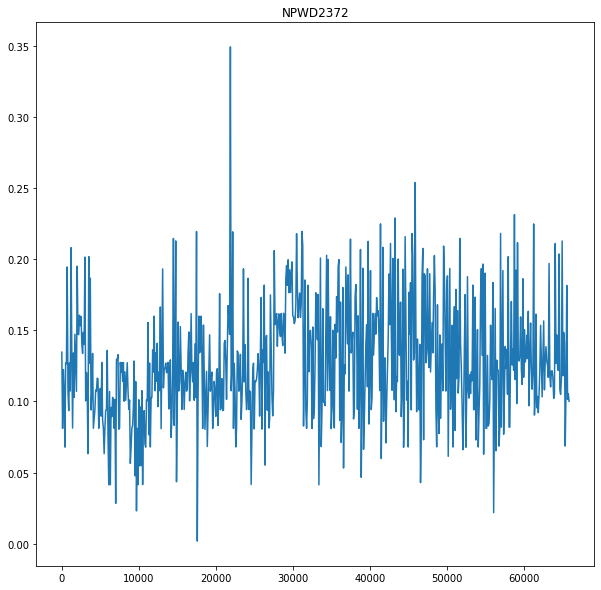

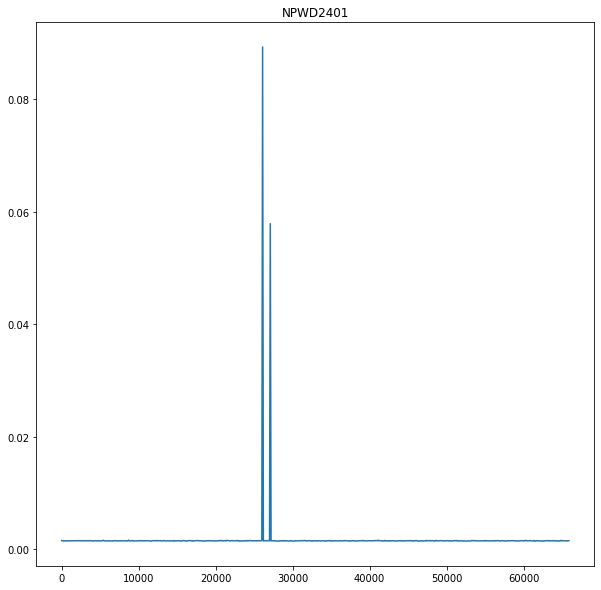

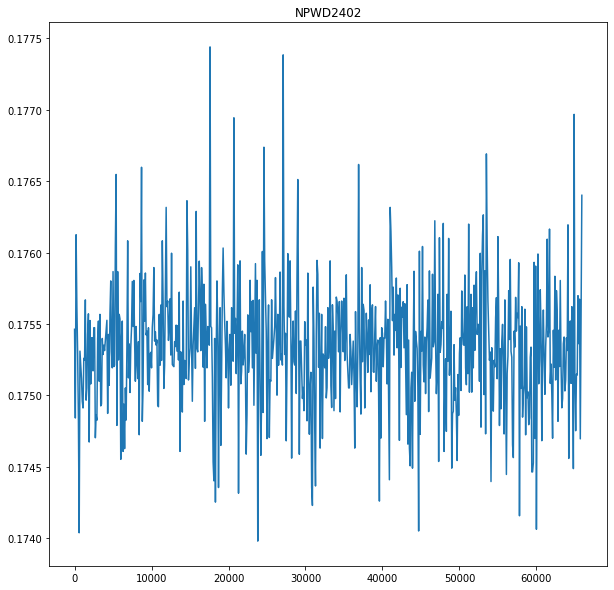

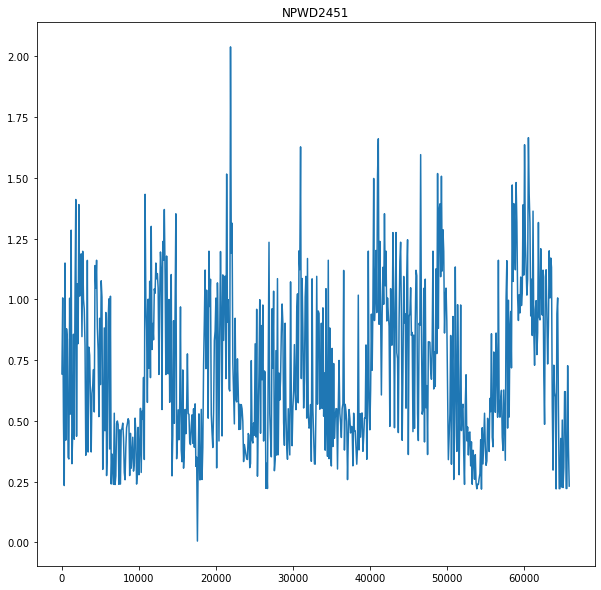

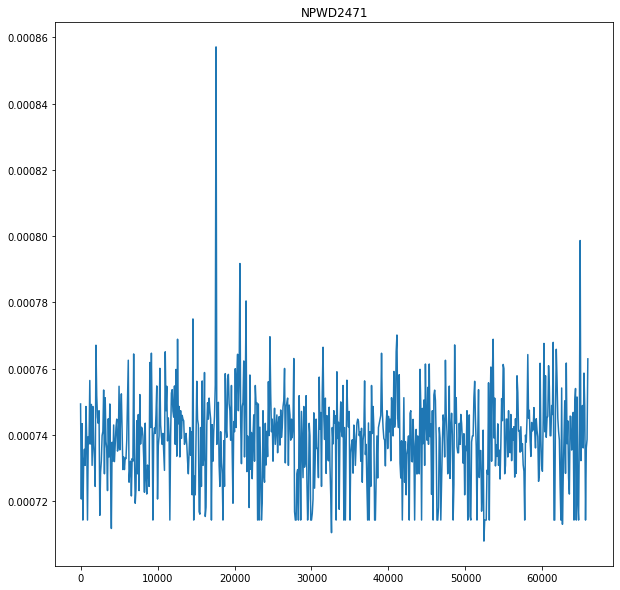

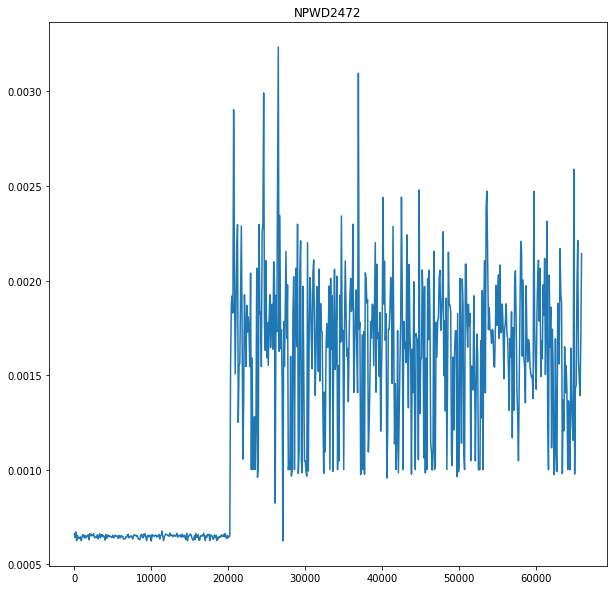

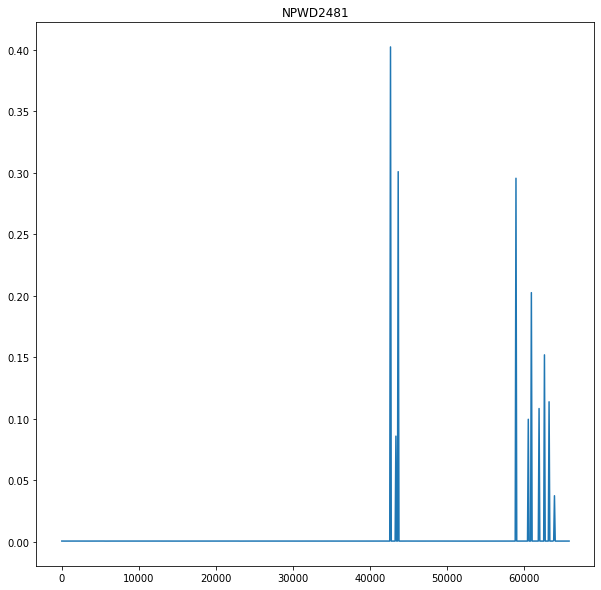

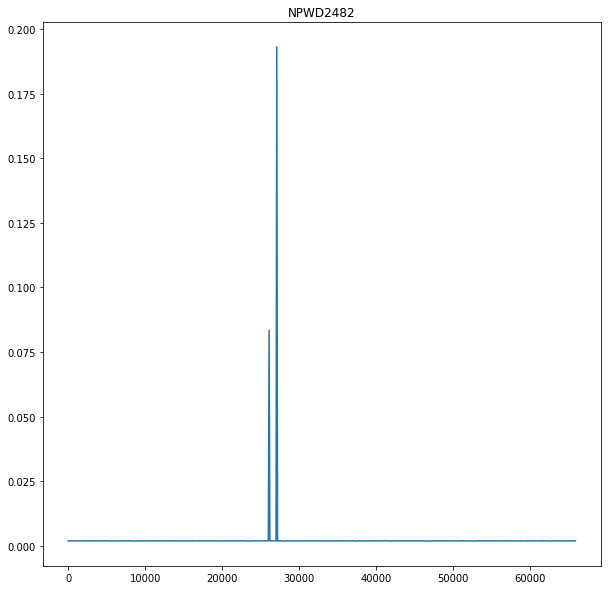

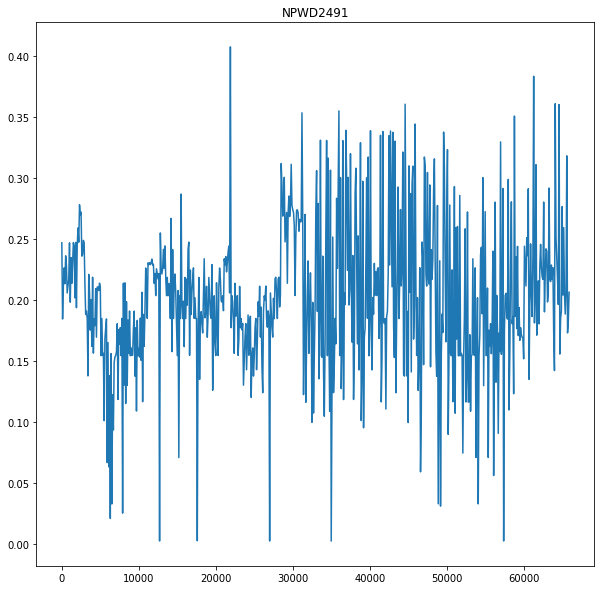

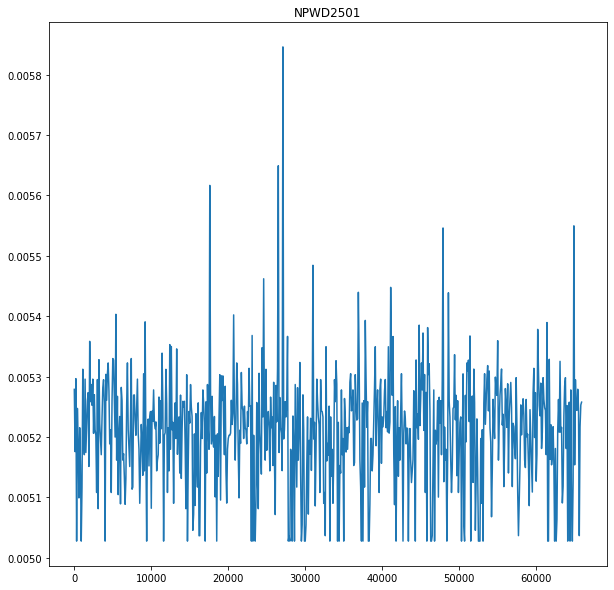

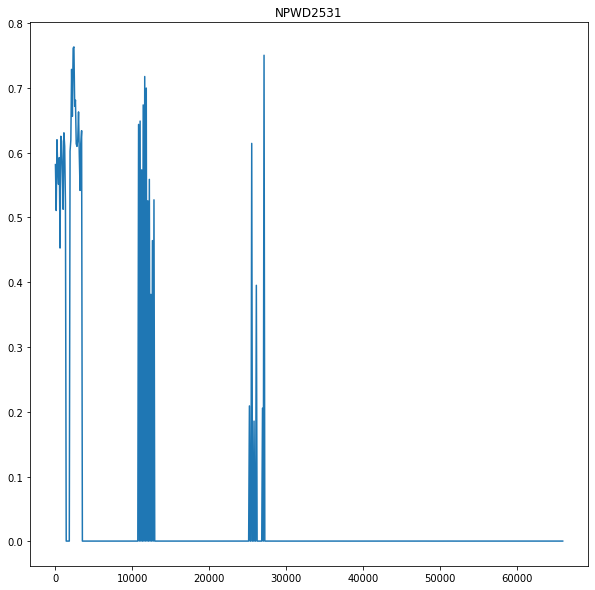

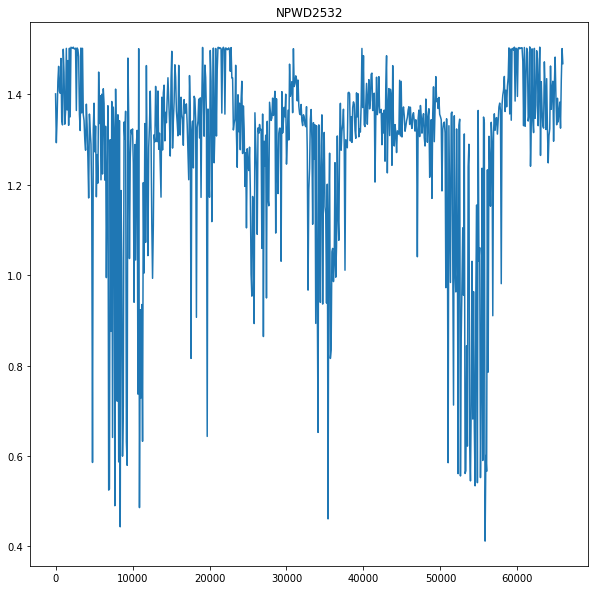

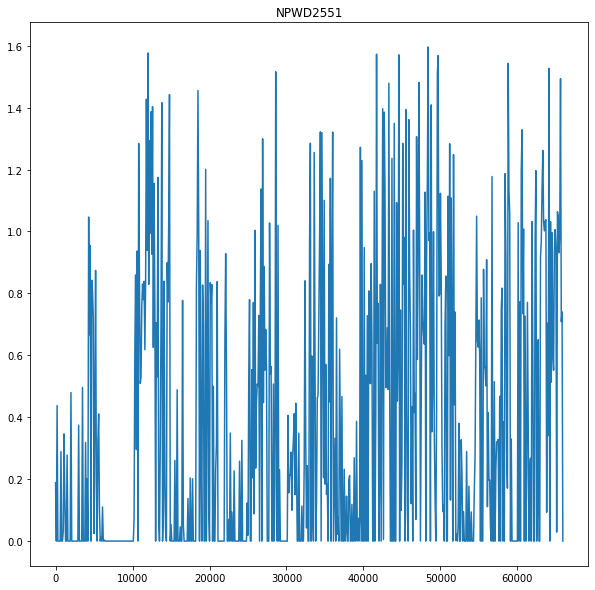

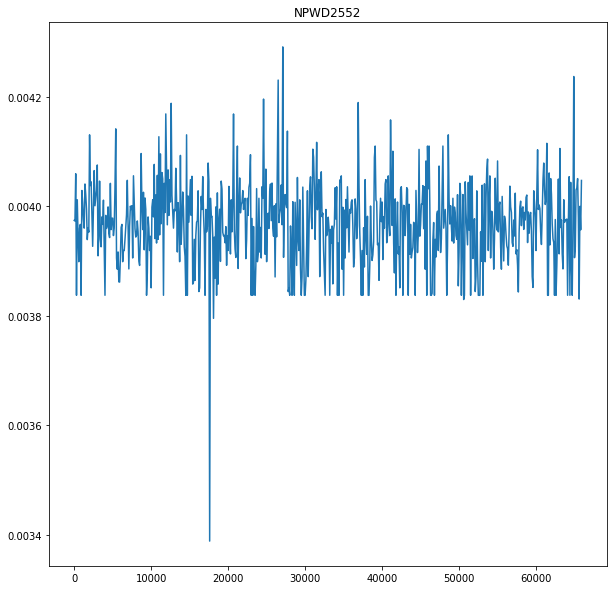

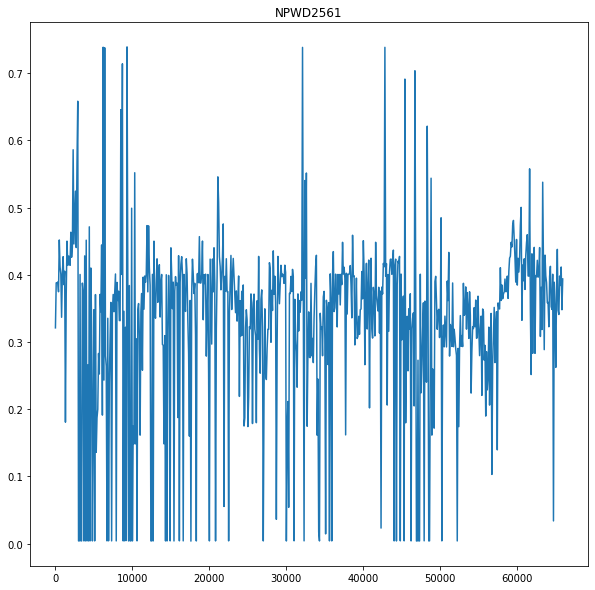

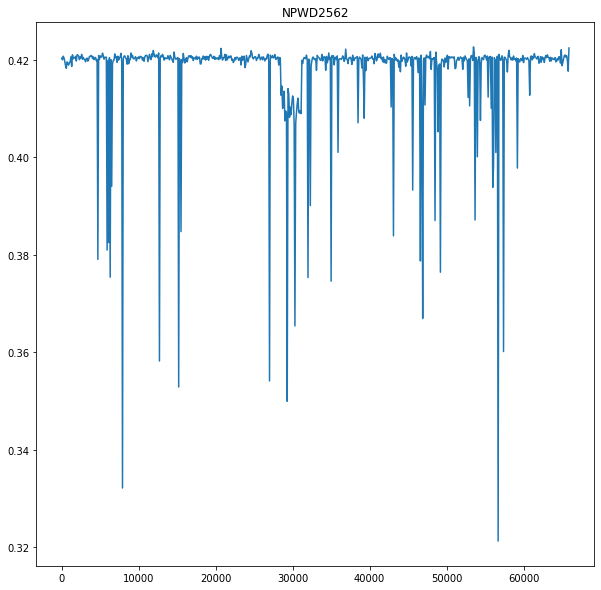

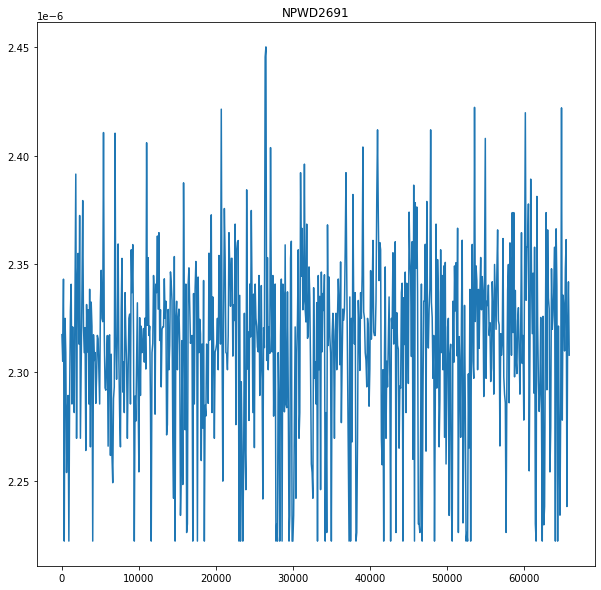

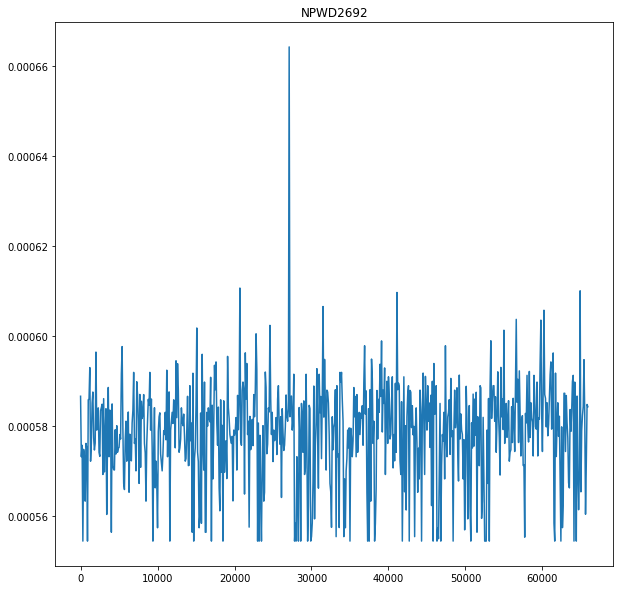

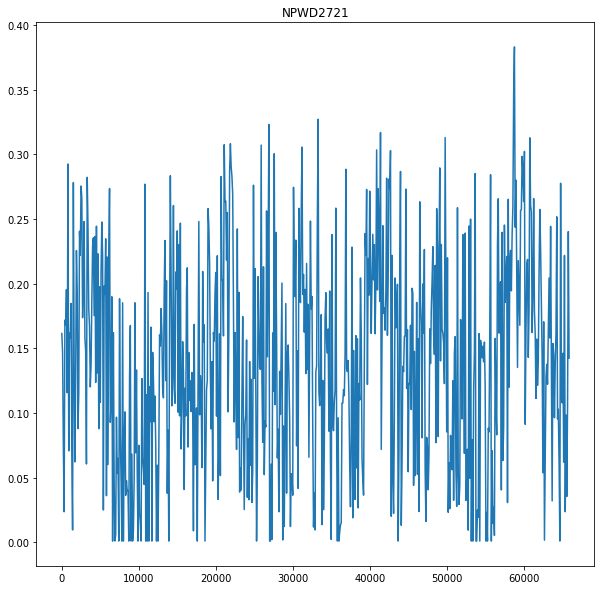

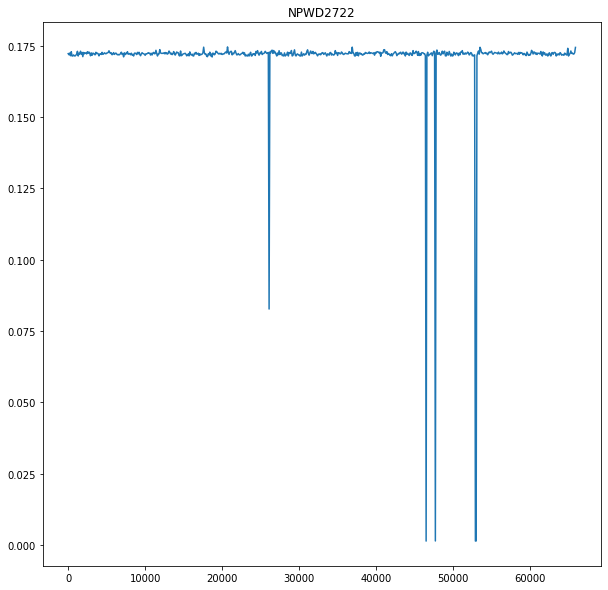

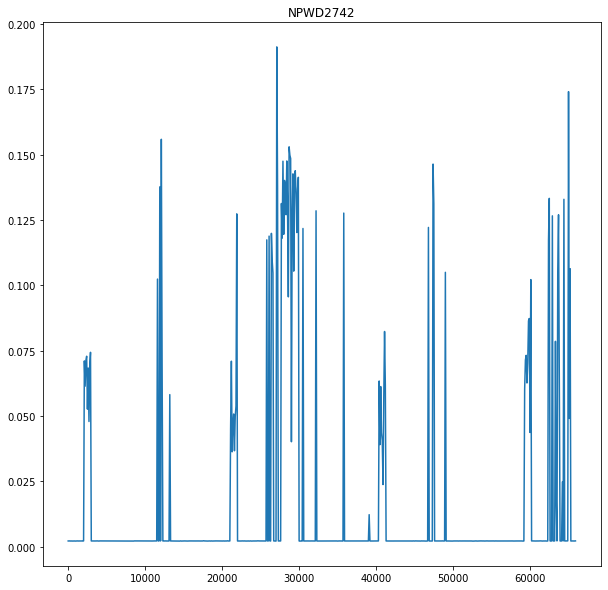

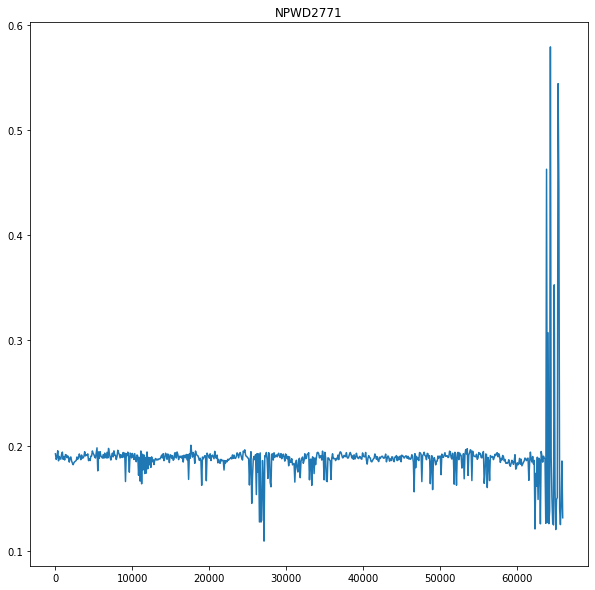

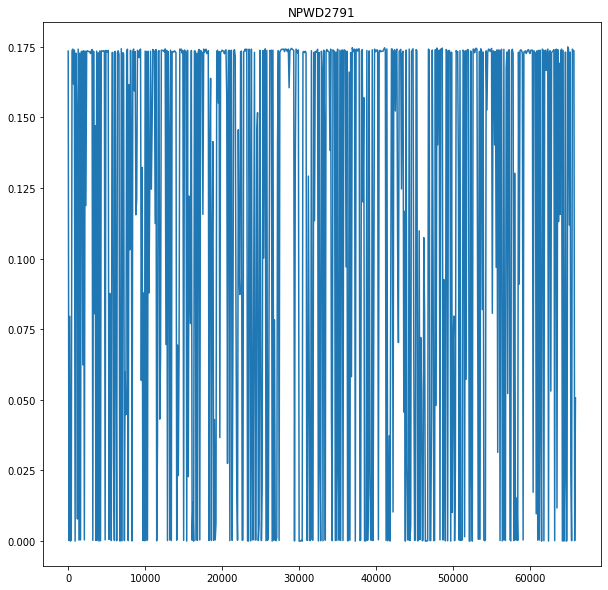

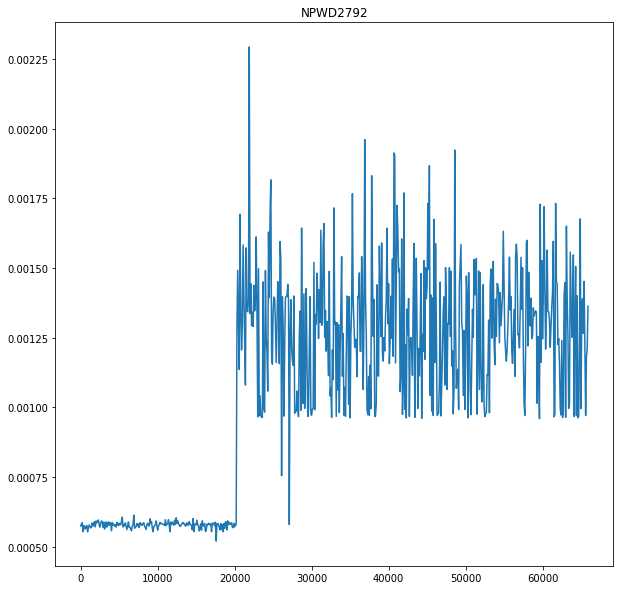

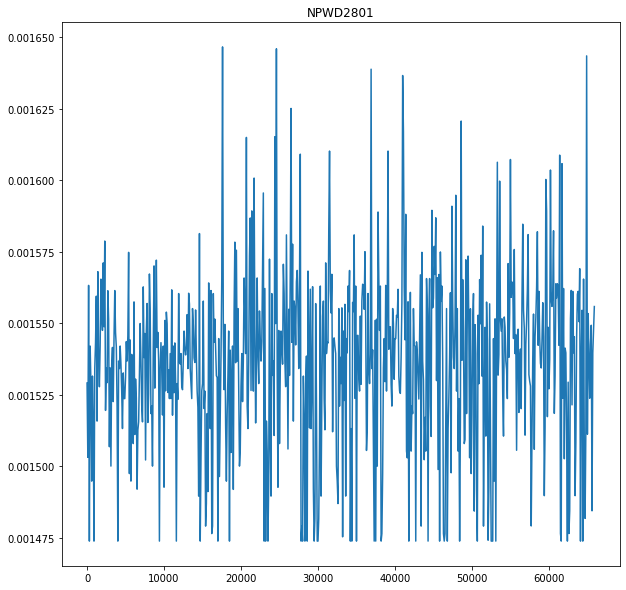

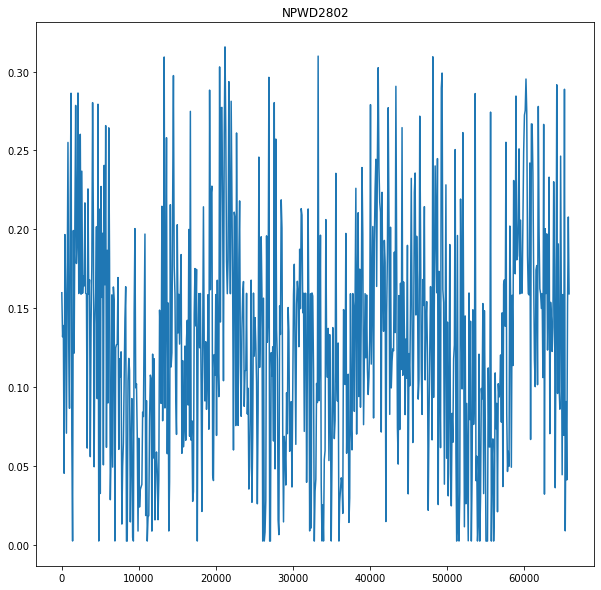

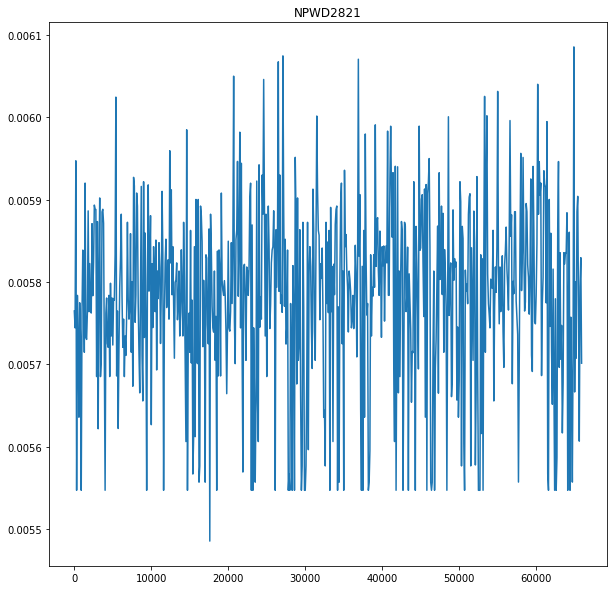

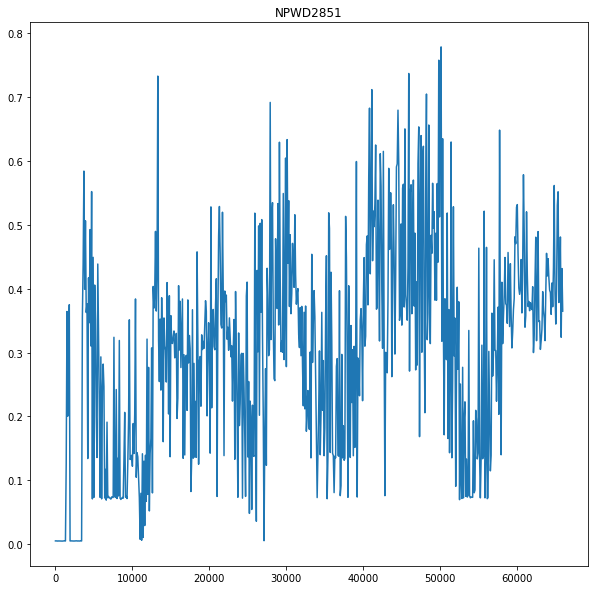

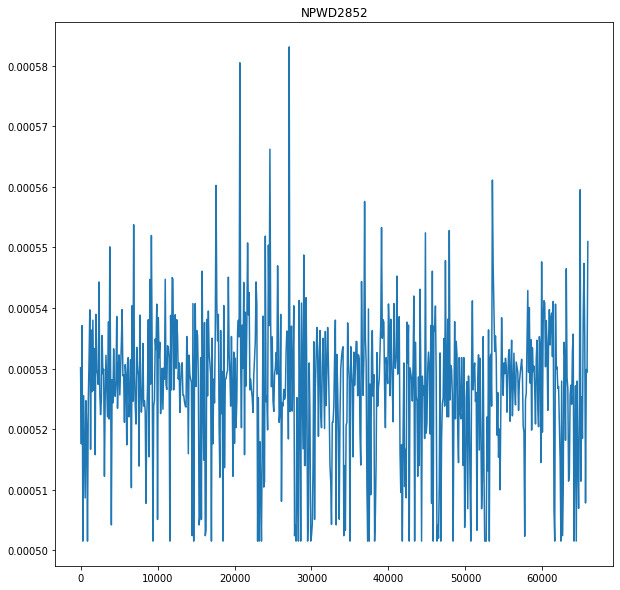

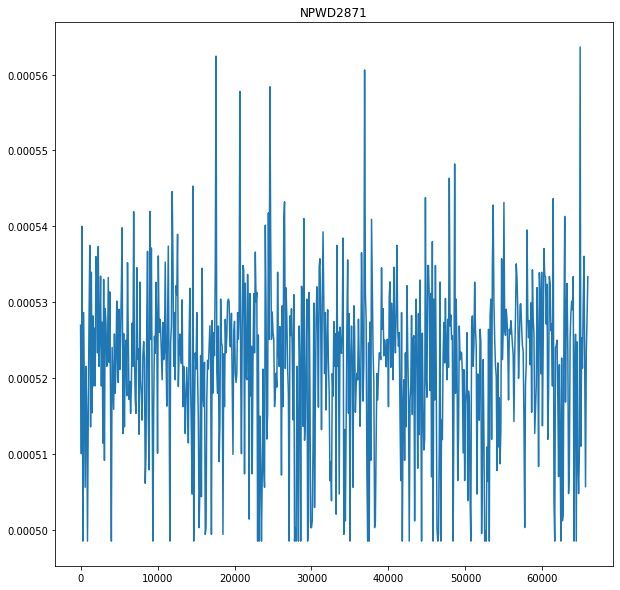

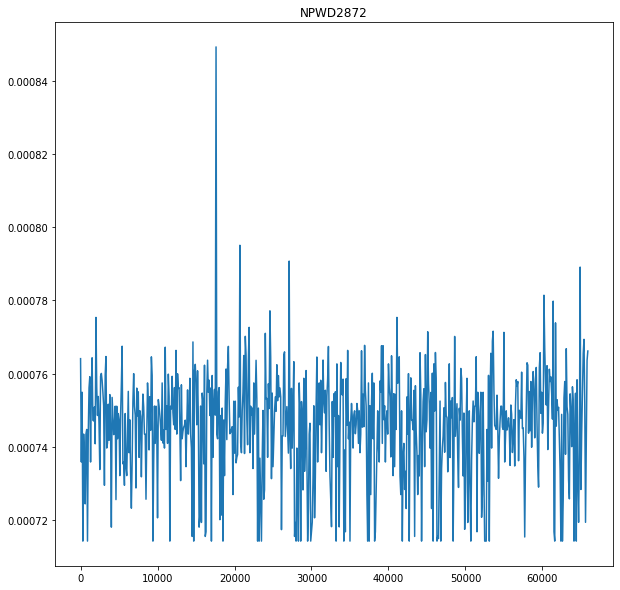

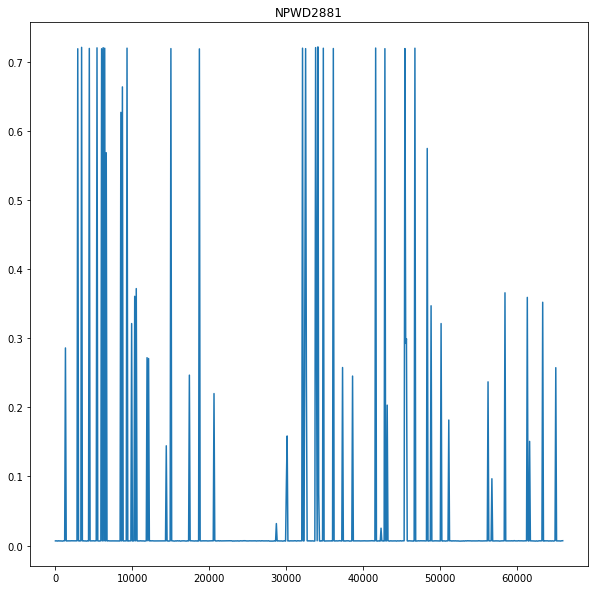

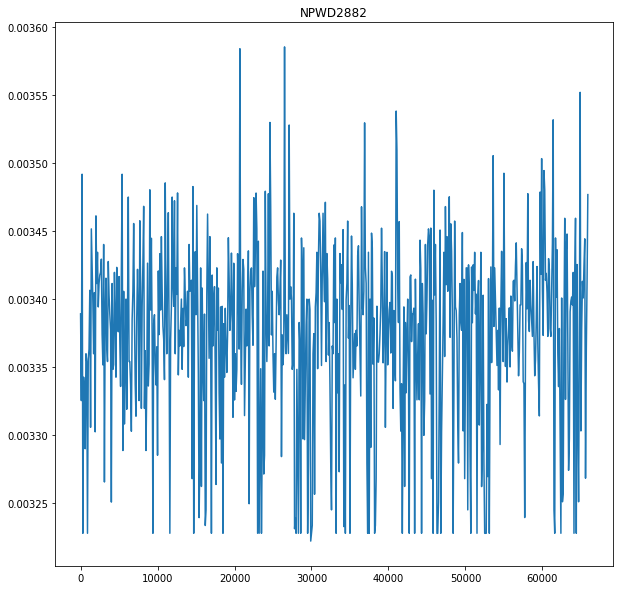

In [13]:
plot_series(df)

In [14]:
df['ut_ms'] = pd.to_datetime(df['ut_ms'], unit = "ms").dt.floor('H')
df = df.set_index('ut_ms')
df = df.resample('1H').mean()


In [15]:
df = df.interpolate()
df = df.ffill()
df = df.bfill()

In [16]:
df.tail()

,panels _J/m2_@influx,back _J/m2_@influx,left _J/m2_@influx,right _J/m2_@influx,up _J/m2_@influx,down _J/m2_@influx,panels-sum1 _J/m2_@influx_sum,panels-sum2 _J/m2_@influx_sum,back-sum1 _J/m2_@influx_sum,back-sum2 _J/m2_@influx_sum,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
ut_ms,,,,,,,,,,,,,,,,,,,,,
2016-02-29 19:00:00,1.875686e+09,0.0,0.000000e+00,5.491744e+06,0.000000e+00,9.177124e+08,1.869792e+09,3.498337e+09,0.0,0.0,...,0.001060,0.001516,0.239700,0.005685,0.462506,0.000519,0.000514,0.000738,0.006629,0.003357
2016-02-29 20:00:00,1.876484e+09,0.0,4.049759e+04,2.330807e+06,4.041070e-08,4.230845e+08,1.875686e+09,3.745479e+09,0.0,0.0,...,0.000992,0.001498,0.125170,0.005617,0.346446,0.000505,0.000506,0.000719,0.006532,0.003256
2016-02-29 21:00:00,1.879081e+09,0.0,5.431308e+03,4.651865e+06,0.000000e+00,1.061342e+09,1.876484e+09,3.752170e+09,0.0,0.0,...,0.000996,0.001513,0.073279,0.005695,0.429497,0.000516,0.000512,0.000735,0.006669,0.003256
2016-02-29 22:00:00,1.875576e+09,0.0,5.710554e-08,2.674176e+06,0.000000e+00,1.014104e+09,1.879081e+09,3.755565e+09,0.0,0.0,...,0.000996,0.001511,0.159029,0.005686,0.391804,0.000518,0.000511,0.000737,0.006596,0.003297
2016-02-29 23:00:00,1.484808e+09,0.0,7.873843e-08,3.827850e+04,1.148255e+08,2.798575e+08,1.875576e+09,3.754657e+09,0.0,0.0,...,0.000996,0.001511,0.159029,0.005686,0.391804,0.000518,0.000511,0.000737,0.006596,0.003297


In [17]:
df.columns[1:-1].tolist()

['back _J/m2_@influx',
 'left _J/m2_@influx',
 'right _J/m2_@influx',
 'up _J/m2_@influx',
 'down _J/m2_@influx',
 'panels-sum1 _J/m2_@influx_sum',
 'panels-sum2 _J/m2_@influx_sum',
 'back-sum1 _J/m2_@influx_sum',
 'back-sum2 _J/m2_@influx_sum',
 'left-sum1 _J/m2_@influx_sum',
 'left-sum2 _J/m2_@influx_sum',
 'right-sum1 _J/m2_@influx_sum',
 'up-sum1 _J/m2_@influx_sum',
 'down-sum1 _J/m2_@influx_sum',
 'ACROSS_TRACK __@ftl',
 'D1PVMC __@ftl',
 'D2PLND __@ftl',
 'D3POCM __@ftl',
 'D4PNPO __@ftl',
 'D5PPHB __@ftl',
 'D7PLTS __@ftl',
 'D8PLTP __@ftl',
 'D9PSPO __@ftl',
 'EARTH __@ftl',
 'FLAGCOMMS __@ftl',
 'FLAGCOMMS_RADIO_SCIENCE __@ftl',
 'FLAGCOMMS_WARMUP __@ftl',
 'INERTIAL __@ftl',
 'MAINTENANCE __@ftl',
 'NADIR __@ftl',
 'NADIR_LANDER __@ftl',
 'SLEW __@ftl',
 'SPECULAR __@ftl',
 'SPOT __@ftl',
 'WARMUP __@ftl',
 'AAAAF01A3 _min_@dmop',
 'AAAAF02A1 _min_@dmop',
 'AAAAF09B1 _min_@dmop',
 'AAAAF09C1 _min_@dmop',
 'AAAAF18C1 _min_@dmop',
 'AAAAF20A1 _min_@dmop',
 'AAAAF23E1 _min_@dmop

In [18]:
targ = last_33_columns = df.iloc[:, -33:].columns
print(targ)
feat = all_but_first_and_last_33 = df.iloc[:, 33:-33].columns
print(feat)
from sklearn.model_selection import train_test_split

# Split the DataFrame into 2/3 training set and 1/3 test set
train_set, test_set = train_test_split(df, test_size=1/3, random_state=42, shuffle=False)

train_set.tail()





Index(['NPWD2372', 'NPWD2401', 'NPWD2402', 'NPWD2451', 'NPWD2471', 'NPWD2472',
       'NPWD2481', 'NPWD2482', 'NPWD2491', 'NPWD2501', 'NPWD2531', 'NPWD2532',
       'NPWD2551', 'NPWD2552', 'NPWD2561', 'NPWD2562', 'NPWD2691', 'NPWD2692',
       'NPWD2721', 'NPWD2722', 'NPWD2742', 'NPWD2771', 'NPWD2791', 'NPWD2792',
       'NPWD2801', 'NPWD2802', 'NPWD2821', 'NPWD2851', 'NPWD2852', 'NPWD2871',
       'NPWD2872', 'NPWD2881', 'NPWD2882'],
      dtype='object')
Index(['SPECULAR __@ftl', 'SPOT __@ftl', 'WARMUP __@ftl',
       'AAAAF01A3 _min_@dmop', 'AAAAF02A1 _min_@dmop', 'AAAAF09B1 _min_@dmop',
       'AAAAF09C1 _min_@dmop', 'AAAAF18C1 _min_@dmop', 'AAAAF20A1 _min_@dmop',
       'AAAAF23E1 _min_@dmop',
       ...
       'bPDNE _min_@dmop_binary_grouped', 'bPENE _min_@dmop_binary_grouped',
       'bPENS _min_@dmop_binary_grouped', 'bPPNE _min_@dmop_binary_grouped',
       'bSCMN _min_@dmop_binary_grouped', 'bTrig _min_@dmop_binary_grouped',
       'bUDBE _min_@dmop_binary_grouped', 'bUPBE _

,panels _J/m2_@influx,back _J/m2_@influx,left _J/m2_@influx,right _J/m2_@influx,up _J/m2_@influx,down _J/m2_@influx,panels-sum1 _J/m2_@influx_sum,panels-sum2 _J/m2_@influx_sum,back-sum1 _J/m2_@influx_sum,back-sum2 _J/m2_@influx_sum,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
ut_ms,,,,,,,,,,,,,,,,,,,,,
2013-08-27 19:00:00,1.946201e+09,0.0,1.675511e+07,0.0,0.0,545713088.0,1.946292e+09,3.890177e+09,0.0,0.0,...,0.001200,0.001541,0.209931,0.005886,0.538436,0.000538,0.000518,0.000750,0.006772,0.003372
2013-08-27 20:00:00,1.946088e+09,0.0,1.674752e+07,0.0,0.0,545845696.0,1.946201e+09,3.892493e+09,0.0,0.0,...,0.001154,0.001515,0.147551,0.005716,0.433426,0.000519,0.000516,0.000739,0.006583,0.003359
2013-08-27 21:00:00,1.941302e+09,0.0,1.405579e+07,0.0,32029576.0,433993248.0,1.946088e+09,3.892289e+09,0.0,0.0,...,0.000967,0.001474,0.156585,0.005547,0.379832,0.000501,0.000499,0.000714,0.006457,0.003228
2013-08-27 22:00:00,1.923949e+09,0.0,1.044368e+06,0.0,307592352.0,66359368.0,1.941302e+09,3.887390e+09,0.0,0.0,...,0.000965,0.001474,0.219202,0.005547,0.285735,0.000501,0.000499,0.000714,0.006457,0.003228
2013-08-27 23:00:00,1.939204e+09,0.0,1.658673e+07,0.0,0.0,543086144.0,1.923949e+09,3.865251e+09,0.0,0.0,...,0.000973,0.001474,0.065842,0.005547,0.373045,0.000501,0.000499,0.000714,0.006457,0.003228


In [19]:


from darts import TimeSeries

y_all = TimeSeries.from_dataframe(df, value_cols=targ, freq='H')
print("siadlo")
past_cov_all = TimeSeries.from_dataframe(df, value_cols = feat)

y_train_all = TimeSeries.from_dataframe(train_set, value_cols=targ)
y_test_all = TimeSeries.from_dataframe(test_set, value_cols=targ)

y_cov_train_all = TimeSeries.from_dataframe(train_set, value_cols=feat)
y_cov_test_all = TimeSeries.from_dataframe(test_set, value_cols=feat)

y_train_all.head()



siadlo


<TimeSeries (DataArray) (ut_ms: 5, component: 33, sample: 1)>
array([[[1.34666756e-01],
        [1.55280286e-03],
        [1.75462753e-01],
        [6.93039238e-01],
        [7.49342551e-04],
        [6.61350205e-04],
        [5.85113070e-04],
        [1.93132926e-03],
        [2.46918127e-01],
        [5.27893566e-03],
        [5.81396461e-01],
        [1.40062940e+00],
        [1.89077020e-01],
        [3.97445448e-03],
        [3.20932388e-01],
        [4.20376062e-01],
        [2.31739546e-06],
        [5.86599694e-04],
        [1.61366850e-01],
        [1.72296792e-01],
...
        [3.90165555e-03],
        [3.84631127e-01],
        [4.19733196e-01],
        [2.29333386e-06],
        [5.76128776e-04],
        [1.18043728e-01],
        [1.72121868e-01],
        [2.17297301e-03],
        [1.90326273e-01],
        [2.94074016e-06],
        [5.66121191e-04],
        [1.52106397e-03],
        [6.04566038e-02],
        [5.75997680e-03],
        [5.17687714e-03],
        [5.25423500e-04],
        [5.25974086e-04],
        [7.38526753e-04],
        [6.67495513e-03],
        [3.37668275e-03]]], dtype=float32)
Coordinates:
  * ut_ms      (ut_ms) datetime64[ns] 2008-08-22 ... 2008-08-22T04:00:00
  * component  (component) object 'NPWD2372' 'NPWD2401' ... 'NPWD2882'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [20]:
from darts import models

In [21]:
from xgboost.sklearn import XGBRegressor
config = xgb.get_config()


xd = models.RegressionModel(
    lags=[-1,-2,-3,-4,-5,-6],
    model=XGBRegressor(),
    lags_past_covariates=[-1]
)

In [22]:
xd.fit(y_train_all, past_covariates = past_cov_all)

In [23]:
df.tail()

,panels _J/m2_@influx,back _J/m2_@influx,left _J/m2_@influx,right _J/m2_@influx,up _J/m2_@influx,down _J/m2_@influx,panels-sum1 _J/m2_@influx_sum,panels-sum2 _J/m2_@influx_sum,back-sum1 _J/m2_@influx_sum,back-sum2 _J/m2_@influx_sum,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
ut_ms,,,,,,,,,,,,,,,,,,,,,
2016-02-29 19:00:00,1.875686e+09,0.0,0.000000e+00,5.491744e+06,0.000000e+00,9.177124e+08,1.869792e+09,3.498337e+09,0.0,0.0,...,0.001060,0.001516,0.239700,0.005685,0.462506,0.000519,0.000514,0.000738,0.006629,0.003357
2016-02-29 20:00:00,1.876484e+09,0.0,4.049759e+04,2.330807e+06,4.041070e-08,4.230845e+08,1.875686e+09,3.745479e+09,0.0,0.0,...,0.000992,0.001498,0.125170,0.005617,0.346446,0.000505,0.000506,0.000719,0.006532,0.003256
2016-02-29 21:00:00,1.879081e+09,0.0,5.431308e+03,4.651865e+06,0.000000e+00,1.061342e+09,1.876484e+09,3.752170e+09,0.0,0.0,...,0.000996,0.001513,0.073279,0.005695,0.429497,0.000516,0.000512,0.000735,0.006669,0.003256
2016-02-29 22:00:00,1.875576e+09,0.0,5.710554e-08,2.674176e+06,0.000000e+00,1.014104e+09,1.879081e+09,3.755565e+09,0.0,0.0,...,0.000996,0.001511,0.159029,0.005686,0.391804,0.000518,0.000511,0.000737,0.006596,0.003297
2016-02-29 23:00:00,1.484808e+09,0.0,7.873843e-08,3.827850e+04,1.148255e+08,2.798575e+08,1.875576e+09,3.754657e+09,0.0,0.0,...,0.000996,0.001511,0.159029,0.005686,0.391804,0.000518,0.000511,0.000737,0.006596,0.003297


In [24]:
test_set.tail()

,panels _J/m2_@influx,back _J/m2_@influx,left _J/m2_@influx,right _J/m2_@influx,up _J/m2_@influx,down _J/m2_@influx,panels-sum1 _J/m2_@influx_sum,panels-sum2 _J/m2_@influx_sum,back-sum1 _J/m2_@influx_sum,back-sum2 _J/m2_@influx_sum,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
ut_ms,,,,,,,,,,,,,,,,,,,,,
2016-02-29 19:00:00,1.875686e+09,0.0,0.000000e+00,5.491744e+06,0.000000e+00,9.177124e+08,1.869792e+09,3.498337e+09,0.0,0.0,...,0.001060,0.001516,0.239700,0.005685,0.462506,0.000519,0.000514,0.000738,0.006629,0.003357
2016-02-29 20:00:00,1.876484e+09,0.0,4.049759e+04,2.330807e+06,4.041070e-08,4.230845e+08,1.875686e+09,3.745479e+09,0.0,0.0,...,0.000992,0.001498,0.125170,0.005617,0.346446,0.000505,0.000506,0.000719,0.006532,0.003256
2016-02-29 21:00:00,1.879081e+09,0.0,5.431308e+03,4.651865e+06,0.000000e+00,1.061342e+09,1.876484e+09,3.752170e+09,0.0,0.0,...,0.000996,0.001513,0.073279,0.005695,0.429497,0.000516,0.000512,0.000735,0.006669,0.003256
2016-02-29 22:00:00,1.875576e+09,0.0,5.710554e-08,2.674176e+06,0.000000e+00,1.014104e+09,1.879081e+09,3.755565e+09,0.0,0.0,...,0.000996,0.001511,0.159029,0.005686,0.391804,0.000518,0.000511,0.000737,0.006596,0.003297
2016-02-29 23:00:00,1.484808e+09,0.0,7.873843e-08,3.827850e+04,1.148255e+08,2.798575e+08,1.875576e+09,3.754657e+09,0.0,0.0,...,0.000996,0.001511,0.159029,0.005686,0.391804,0.000518,0.000511,0.000737,0.006596,0.003297


In [25]:
y_pred = xd.predict(
    n=len(test_set),
    series = y_train_all,
    past_covariates=past_cov_all
)

In [26]:
# Extract the target column(s) from the test_set DataFrame
y_test = test_set[targ]


print(y_test)

                     NPWD2372  NPWD2401  NPWD2402  NPWD2451  NPWD2471  \
ut_ms                                                                   
2013-08-28 00:00:00  0.123295  0.001503  0.174678  1.350178  0.000728   
2013-08-28 01:00:00  0.120551  0.001539  0.174722  1.141567  0.000742   
2013-08-28 02:00:00  0.127817  0.001554  0.174961  0.978293  0.000740   
2013-08-28 03:00:00  0.183622  0.001577  0.175661  1.323960  0.000755   
2013-08-28 04:00:00  0.194843  0.001516  0.175052  1.169386  0.000730   
...                       ...       ...       ...       ...       ...   
2016-02-29 19:00:00  0.087648  0.001501  0.175339  0.704210  0.000728   
2016-02-29 20:00:00  0.081554  0.001488  0.175309  0.705948  0.000723   
2016-02-29 21:00:00  0.186023  0.001522  0.174725  0.230247  0.000738   
2016-02-29 22:00:00  0.161118  0.001506  0.175007  0.507806  0.000730   
2016-02-29 23:00:00  0.161118  0.001506  0.175007  0.507806  0.000730   

                     NPWD2472  NPWD2481  NPWD2482 

In [27]:
print(y_test_all)
print(y_pred)

<TimeSeries (DataArray) (ut_ms: 21984, component: 33, sample: 1)>
array([[[0.12329546],
        [0.00150272],
        [0.17467776],
        ...,
        [0.0007315 ],
        [0.00658316],
        [0.00329635]],

       [[0.1205508 ],
        [0.00153939],
        [0.17472196],
        ...,
        [0.00075295],
        [0.00682418],
        [0.00337757]],

       [[0.1278166 ],
        [0.00155395],
        [0.17496121],
        ...,
...
        ...,
        [0.00073458],
        [0.00666939],
        [0.00325619]],

       [[0.16111802],
        [0.00150561],
        [0.17500724],
        ...,
        [0.00073736],
        [0.00659582],
        [0.00329695]],

       [[0.16111802],
        [0.00150561],
        [0.17500724],
        ...,
        [0.00073736],
        [0.00659582],
        [0.00329695]]], dtype=float32)
Coordinates:
  * ut_ms      (ut_ms) datetime64[ns] 2013-08-28 ... 2016-02-29T23:00:00
  * component  (component) object 'NPWD2372' 'NPWD2401' ... 'NPWD2882'
Dimensions

In [28]:
xdddd = y_test_all.pd_dataframe()

In [29]:
xdddddd = y_pred.pd_dataframe()

In [30]:
xdddd = xdddd.interpolate()
xdddddd = xdddddd.interpolate()

In [31]:
xdddddd.isna().sum()

component
NPWD2372    0
NPWD2401    0
NPWD2402    0
NPWD2451    0
NPWD2471    0
NPWD2472    0
NPWD2481    0
NPWD2482    0
NPWD2491    0
NPWD2501    0
NPWD2531    0
NPWD2532    0
NPWD2551    0
NPWD2552    0
NPWD2561    0
NPWD2562    0
NPWD2691    0
NPWD2692    0
NPWD2721    0
NPWD2722    0
NPWD2742    0
NPWD2771    0
NPWD2791    0
NPWD2792    0
NPWD2801    0
NPWD2802    0
NPWD2821    0
NPWD2851    0
NPWD2852    0
NPWD2871    0
NPWD2872    0
NPWD2881    0
NPWD2882    0
dtype: int64

In [34]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(xdddd, xdddddd)
print("Mean Absolute Error: ", mae)

rmse = np.sqrt(mean_squared_error(xdddd, xdddddd))
print("Mean Root Square Error: ", rmse)

Mean Absolute Error:  0.081820644
Mean Root Square Error:  0.15673617


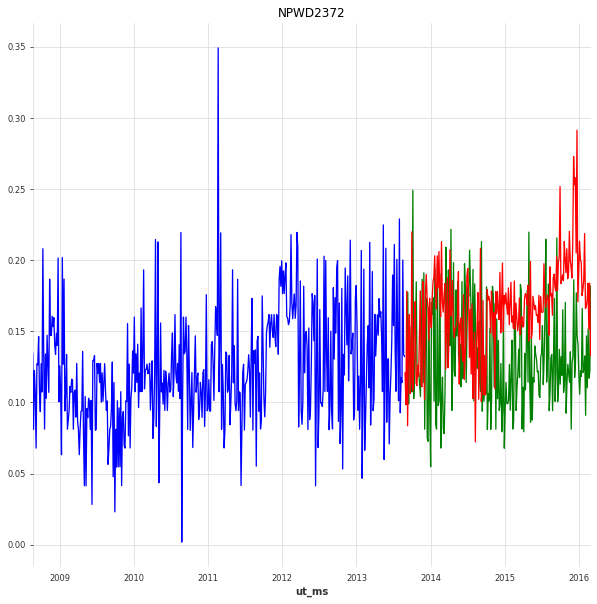

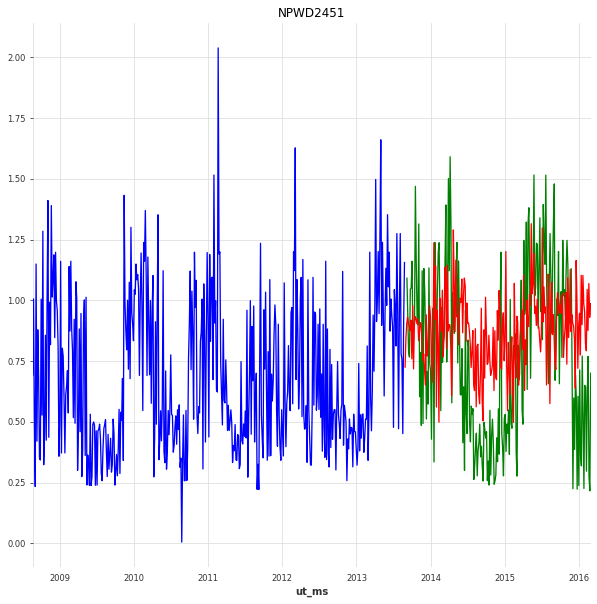

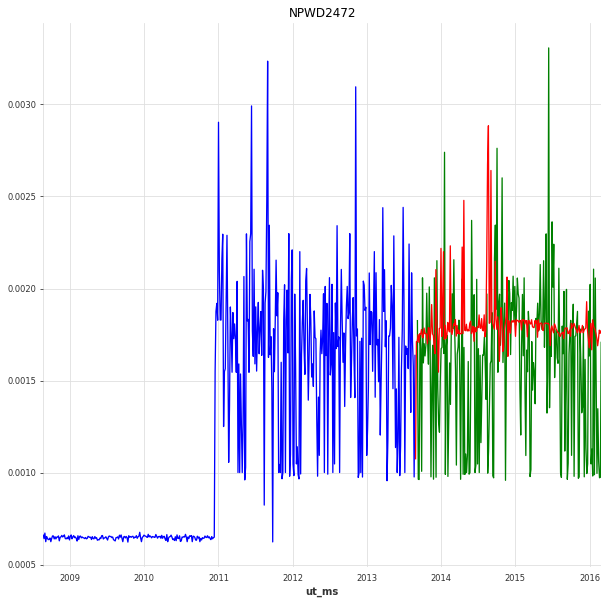

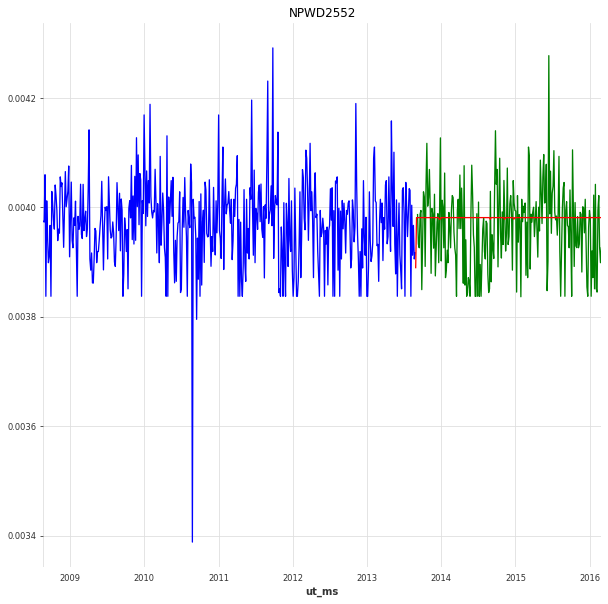

In [43]:
interesting_plots=['NPWD2372' , 'NPWD2451' , 'NPWD2472' , 'NPWD2552']

for column in interesting_plots:
  plt.figure()
  train_set[column].iloc[::100].plot(color="blue")
  y_test[column].iloc[::100].plot(color="green")
  xdddddd[column].iloc[::100].plot(color="red")
  plt.title(column)
  plt.show()

In [36]:
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
last_33_columns = df.iloc[:, -33:]
rest_columns = df.iloc[:, :-33]

X_train, X_test, y_train, y_test = train_test_split(rest_columns, last_33_columns, test_size=0.33, random_state=42, shuffle=False)

In [37]:
df.isna().sum()

panels _J/m2_@influx               0
back _J/m2_@influx                 0
left _J/m2_@influx                 0
right _J/m2_@influx                0
up _J/m2_@influx                   0
down _J/m2_@influx                 0
panels-sum1 _J/m2_@influx_sum      0
panels-sum2 _J/m2_@influx_sum      0
back-sum1 _J/m2_@influx_sum        0
back-sum2 _J/m2_@influx_sum        0
left-sum1 _J/m2_@influx_sum        0
left-sum2 _J/m2_@influx_sum        0
right-sum1 _J/m2_@influx_sum       0
up-sum1 _J/m2_@influx_sum          0
down-sum1 _J/m2_@influx_sum        0
ACROSS_TRACK __@ftl                0
D1PVMC __@ftl                      0
D2PLND __@ftl                      0
D3POCM __@ftl                      0
D4PNPO __@ftl                      0
D5PPHB __@ftl                      0
D7PLTS __@ftl                      0
D8PLTP __@ftl                      0
D9PSPO __@ftl                      0
EARTH __@ftl                       0
FLAGCOMMS __@ftl                   0
FLAGCOMMS_RADIO_SCIENCE __@ftl     0
F

In [54]:
rf = RandomForestRegressor(verbose=2)

rf.fit(X_train, y_train)
# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Root Square Error: ", rmse)






[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Mean Absolute Error:  0.033110399601248335
Mean Root Square Error:  0.09572255135656309


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


ut_ms
2013-09-06 03:00:00    0.100271
2013-09-06 04:00:00    0.192826
2013-09-06 05:00:00    0.169061
2013-09-06 06:00:00    0.095537
2013-09-06 07:00:00    0.142251
                         ...   
2016-02-29 19:00:00    0.124653
2016-02-29 20:00:00    0.134147
2016-02-29 21:00:00    0.110595
2016-02-29 22:00:00    0.120396
2016-02-29 23:00:00    0.141170
Freq: H, Name: 0, Length: 21765, dtype: float64
ut_ms
2013-09-06 03:00:00    0.003930
2013-09-06 04:00:00    0.003979
2013-09-06 05:00:00    0.003956
2013-09-06 06:00:00    0.003988
2013-09-06 07:00:00    0.003964
                         ...   
2016-02-29 19:00:00    0.003965
2016-02-29 20:00:00    0.003964
2016-02-29 21:00:00    0.003991
2016-02-29 22:00:00    0.003982
2016-02-29 23:00:00    0.003957
Freq: H, Name: NPWD2552, Length: 21765, dtype: float64


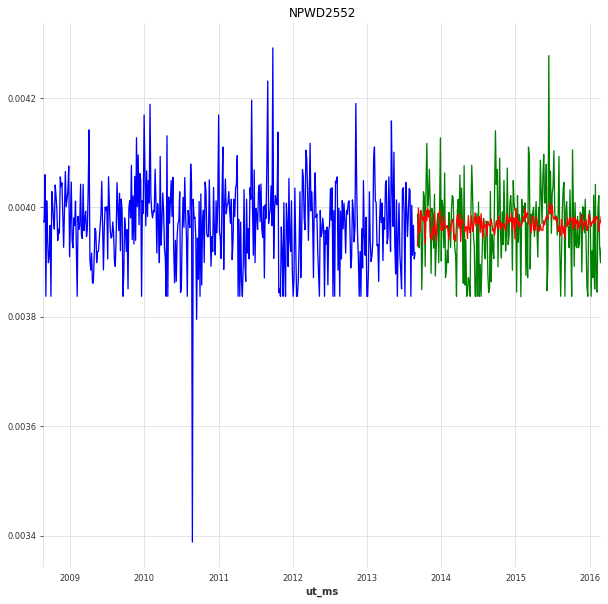

In [88]:
interesting_plots=['NPWD2372' , 'NPWD2451' , 'NPWD2472' , 'NPWD2552']

#print(y_test)

df_results = pd.DataFrame(y_pred)
df_copy = y_test.copy()
#df_copy['NPWD2372'] = df_results[0]
df_results.set_index(df_copy.index, inplace=True)
df_copy.loc[:, 'NPWD2552'] = df_results.iloc[:, 13]

print(df_results[0])
print(df_copy['NPWD2552'])

df_results = pd.DataFrame(y_pred)

plt.figure()
train_set['NPWD2552'].iloc[::100].plot(color="blue")
y_test['NPWD2552'].iloc[::100].plot(color="green")
df_copy['NPWD2552'].iloc[::100].plot(color="red")
plt.title('NPWD2552')
plt.show()

In [45]:
# Create a GradientBoostingRegressor
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# Create a MultiOutputRegressor
multi_reg = MultiOutputRegressor(xgb)

# Fit the MultiOutputRegressor to the training data
multi_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = multi_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Root Square Error: ", rmse)

Mean Absolute Error:  0.029713346
Mean Root Square Error:  0.083896644


In [46]:
# Create a GradientBoostingRegressor
lgb = LGBMRegressor(random_state=42)

# Create a MultiOutputRegressor
multi_reg = MultiOutputRegressor(lgb)

# Fit the MultiOutputRegressor to the training data
multi_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = multi_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Root Square Error: ", rmse)



Mean Absolute Error:  0.02883568590701784
Mean Root Square Error:  0.08422147117044318


21765


AttributeError: ignored

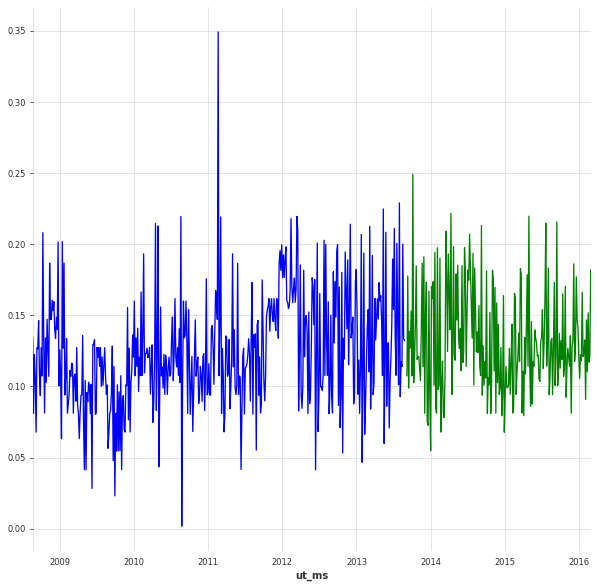

In [53]:
interesting_plots=['NPWD2372' , 'NPWD2451' , 'NPWD2472' , 'NPWD2552']

for column in interesting_plots:
  print(y_pred)
  plt.figure()
  train_set[column].iloc[::100].plot(color="blue")
  y_test[column].iloc[::100].plot(color="green")
  y_pred.plot(color="red")
  plt.title(column)
  plt.show()